# Stationary Points

Let's assume that a stationary point has coordinates $(x^*, y^*)$. An arbitrary ordinary point is in the vicinity $(x^* + du, y^* + dv)$, then:

$$ \frac{dv}{du} = \frac{cu + dv}{au + bv} $$

where:

$$a = \left( \frac{\partial{P}}{\partial{x}} \right)_{x^*, y^*} b = \left( \frac{\partial{P}}{\partial{y}} \right)_{x^*, y^*} c = \left( \frac{\partial{Q}}{\partial{x}} \right)_{x^*, y^*}  d = \left( \frac{\partial{Q}}{\partial{y}} \right)_{x^*, y^*}$$

We define three parameters: $q, p and r$ which will classify the stationary point

$$ q = ad - bc, p = -(a + d), r = p^2 - 4q $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Let's define the example equations:

In [2]:
t, x, y = sp.symbols('t x y')
P = sp.Function('P')(x, y)
Q = sp.Function('Q')(x, y)
P

P(x, y)

Our equations are:

$$ \frac{dx(t)}{dt} = y(t), \frac{dy(t)}{dt} = -x(t) + x^3(t) $$

In [3]:
P_eq = sp.Eq(P, y)
P_eq

Eq(P(x, y), y)

In [4]:
Q_eq = sp.Eq(Q, -x + x**3)
Q_eq

Eq(Q(x, y), x**3 - x)

Now we find fixed points:

In [5]:
fixed_points = sp.solve([P_eq.rhs, Q_eq.rhs], [x, y])
fixed_points

[(-1, 0), (0, 0), (1, 0)]

In [6]:
a = P_eq.rhs.diff(x)
a

0

In [7]:
b = P_eq.rhs.diff(y)
b

1

In [8]:
c = Q_eq.rhs.diff(x)
c

3*x**2 - 1

In [9]:
d = Q_eq.rhs.diff(y)
d

0

Now we define $p, q, r$

In [10]:
q = a*d - b*c
q

1 - 3*x**2

In [11]:
p = -(a + d)
p

0

In [12]:
r = p**2 - 4*q
r

12*x**2 - 4

We can also use function:

In [13]:
q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y)
r

12*x**2 - 4

And we can also evaluate it for the fixed point, in this example $(1, 0)$

In [14]:
fixed_point = fixed_points[2]
fixed_point

(1, 0)

In [15]:
q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=fixed_point)
print(f'q = {q}, p = {p}, r = {r}')

q = -2.00000000000000, p = 0, r = 8.00000000000000


And now we can classify given fixed point:

In [16]:
classify_fixed_point(q, p, r)

'saddle'

Let's check if that was true.

In [31]:
a, b = -4, 4
x_step, v_step = .25, .25
parameters = (a, b, x_step, a, b, v_step)

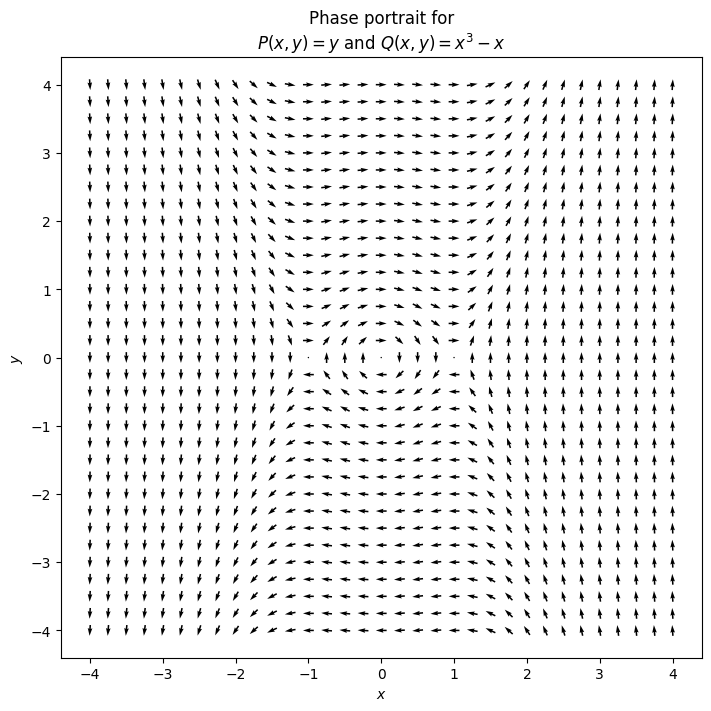

In [34]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
phase_portrait([P_eq, Q_eq], [x, y], parameters, axes, normalize=True)
_=axes.set(title=f'Phase portrait for\n${sp.latex(P_eq)}$ and ${sp.latex(Q_eq)}$')

We can also assume that point $(-1, 0)$ is also a saddle point and $(0, 0)$ is a vortex. Let's check:

In [35]:
fixed_point = fixed_points[0]
classify_fixed_point(*find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=fixed_point))

'saddle'

In [36]:
fixed_point = fixed_points[1]
classify_fixed_point(*find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=fixed_point))

'vortex/focal'